In [1]:
# !pip install pandas
import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sym.init_printing()
sym.__version__


'1.11.1'

## Correlación


La correlación entre las señales $f(t)$ y $g(t)$ es una operación que indica cuán parecidas son las dos señales entre sí.

\begin{equation}
(f \; \circ \; g)(\tau) = h(\tau) = \int_{-\infty}^{\infty} f(t) \cdot g(t + \tau) \; dt
\end{equation}

Observe que la correlación y la convolución tienen estructura similares.

\begin{equation}
f(t) * g(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t - \tau) \; d\tau
\end{equation}

## Señales periódicas

La señal $y(t)$ es periódica si cumple con la condición $y(t+nT)=y(t)$ para todo $n$ entero. En este caso, $T$ es el periodo de la señal.
 
![SENO](figuras/grafica_seno.PNG)

La señal seno es la oscilación más pura que se puede expresar matemáticamente. Esta señal surge al considerar la proyección de un movimiento circular uniforme.



## Serie de Fourier


Si se combinan apropiadamente un conjunto de oscilaciones puras, como combinaciones lineales de señales desplazadas y escaladas en tiempo y amplitud, podría recrearse cualquiér señal periódica. Esta idea da lugar a las series de Fourier.

\begin{equation}
y(t) = \sum_{n=0}^{\infty} C_n \cdot cos(n \omega_0 t - \phi_n)
\end{equation}

La señal $y(t)$ es igual a una combinación de infinitas señales coseno, cada una con una amplitud $C_n$, una frecuencia $n \omega_0$ y un desfase $\phi_n$.


También puede expresarse como:

\begin{equation}
y(t) = \sum_{n=0}^{\infty} A_n \cdot cos(n \omega_0 t) + B_n \cdot sin(n \omega_0 t)  
\end{equation}

La serie queda definida si se encuentran los valores apropiados de $A_n$ y $B_n$ para todos los valores de $n$.

Observe que:
- $A_n$ debe ser más grande si $y(t)$ se "parece" más a un cos.
- $B_n$ debe ser más grande si $y(t)$ se "parece" más a un sin.

\begin{equation}
y(t) = \sum_{n=0}^{\infty} A_n \cdot cos(n \omega_0 t) + B_n \cdot sin(n \omega_0 t)  
\end{equation}

\begin{equation}
(f \; \circ \; g)(\tau) = \int_{-\infty}^{\infty} f(t) \cdot g(t + \tau) \; dt
\end{equation}

\begin{equation}
(y \; \circ \; sin_n)(\tau) = \int_{-\infty}^{\infty} y(t) \cdot sin(n \omega_0(t + \tau)) \; dt
\end{equation}



Considerando:
- $\tau=0$ para no incluir desfases.
- la señal $y(t)$ es periódica con periodo $T$.

\begin{equation}
(y \; \circ \; sin_n)(0) = \frac{1}{T} \int_{0}^{T} y(t) \cdot sin(n \omega_0 t) \; dt
\end{equation}

Esta expresión puede interpretarse como el parecido de una señal $y(t)$ a la señal $sin$ con crecuencia $n \omega_0$ promediado a lo largo de un periodo sin desfase del seno.

Retomando la idea inicial

\begin{equation}
y(t) = \sum_{n=0}^{\infty} A_n \cdot cos(n \omega_0 t) + B_n \cdot sin(n \omega_0 t)  
\end{equation}

donde
\begin{equation}
A_n = \frac{1}{T} \int_{0}^{T} y(t) \cdot cos(n \omega_0 t) \; dt
\end{equation}

\begin{equation}
B_n = \frac{1}{T} \int_{0}^{T} y(t) \cdot sin(n \omega_0 t) \; dt
\end{equation}

Se recomienda al estudiante que encuentre la relación entre las Series anteriores y la siguiente alternativa para representar la Series de Fourier.

\begin{equation}
y(t) = \sum_{n=-\infty}^{\infty} C_n \cdot e^{j n \omega_0 t}
\end{equation}

donde 

\begin{equation}
C_n = \frac{1}{T} \int_{0}^{T} y(t) \cdot e^{-j n \omega_0 t} \; dt
\end{equation}

Los valores $C_n$ son el espectro de la señal periódica $y(t)$ y son una representación en el dominio de la frecuencia.

**Ejemplo # 1**

La señal $y(t) = sin(2 \pi t)$ es en sí misma una oscilación pura de periodo $T=1$. 

In [70]:
# Se define y como el seno de t
t = sym.symbols('t', real=True)
#T = sym.symbols('T', real=True)
T = 0.3
n = sym.symbols('n', real=True)
# delta = sym.DiracDelta(nw)
w0 = 2 * sym.pi / T

# y = t**2
# y = 4*sym.sin(w0*t + 0.5) - 10
# y = sym.sin(w0*t)
y = (t-0.5)*(t-0.5)
# y = 2.5*sym.sin(w0*t ) 
# y = 2.5*(sym.sin(w0*t))**2 + (sym.sin(7.5*w0*t))**2 
y 


Aunque la sumatoria de las series de Fourier incluye infinitos términos, solamente se tomaran las primeras 3 componentes.

In [71]:
y*sym.exp(-1j*n*w0*t)

In [72]:
sym.integrate(y*sym.exp(-1j*n*w0*t),(t,0,T))*(1/T)

                 ⎛⎧    ⎛            2  2                         ⎞   ⎛        
                 ⎜⎪1.0⋅⎝- 0.0375⋅ⅈ⋅π ⋅n  + 0.0225⋅π⋅n + 0.00675⋅ⅈ⎠   ⎝- 0.006⋅
                 ⎜⎪─────────────────────────────────────────────── - ─────────
3.33333333333333⋅⎜⎨                      3  3                                 
                 ⎜⎪                     π ⋅n                                  
                 ⎜⎪                                                           
                 ⎝⎩                                                 0.039     

   2  2                        ⎞  -2.0⋅ⅈ⋅π⋅n           ⎞
ⅈ⋅π ⋅n  + 0.009⋅π⋅n + 0.00675⋅ⅈ⎠⋅ℯ                     ⎟
────────────────────────────────────────────  for n ≠ 0⎟
                3  3                                   ⎟
               π ⋅n                                    ⎟
                                                       ⎟
                                              otherwise⎠

In [73]:
n = 5
(1/T)*sym.integrate(y*sym.exp(-1j*n*w0*t), (t,0,T)).evalf()

In [74]:
n_max = 10
y_ser = 0
C = 0
ns = range(-n_max,n_max+1)
espectro = pd.DataFrame(index = ns,
                        columns= ['n','w','C','C_real','C_imag','C_Abs','C_Arg'])

for n in espectro.index:
    C_n = (1/T)*sym.integrate(y*sym.exp(-1j*n*w0*t), (t,0,T)).evalf()
    y_ser = y_ser + C_n*sym.exp(1j*n*w0*t)
    espectro['C'][n]=C_n
    C_r = float(sym.re(C_n))
    C_i = float(sym.im(C_n))
    C_Abs = float(sym.Abs(C_n))
    C_Arg = float(sym.arg(C_n))
    espectro['n'][n] = n
    espectro['w'][n] = n*w0
    espectro['C_real'][n] = C_r
    espectro['C_imag'][n] = C_i
    espectro['C_Abs'][n] = C_Abs
    espectro['C_Arg'][n] = C_Arg


In [75]:
espectro

,n,w,C,C_real,C_imag,C_Abs,C_Arg
-10,-10,-66.6666666666667*pi,4.5594532639052e-5 + 0.0033422538049298*I,0.000046,0.003342,0.003343,1.557155
-9,-9,-60.0*pi,5.62895464679654e-5 + 0.00371361533881089*I,0.000056,0.003714,0.003714,1.55564
-8,-8,-53.3333333333333*pi,7.12414572485188e-5 + 0.00417781725616225*I,0.000071,0.004178,0.004178,1.553746
-7,-7,-46.6666666666667*pi,9.30500666103152e-5 + 0.00477464829275686*I,0.000093,0.004775,0.004776,1.55131
-6,-6,-40.0*pi,0.000126651479552922 + 0.00557042300821634*I,0.000127,0.00557,0.005572,1.548064
-5,-5,-33.3333333333333*pi,0.000182378130556208 + 0.0066845076098596*I,0.000182,0.006685,0.006687,1.543519
-4,-4,-26.6666666666667*pi,0.000284965828994075 + 0.00835563451232451*I,0.000285,0.008356,0.00836,1.536705
-3,-3,-20.0*pi,0.000506605918211689 + 0.0111408460164327*I,0.000507,0.011141,0.011152,1.525355
-2,-2,-13.3333333333333*pi,0.0011398633159763 + 0.016711269024649*I,0.00114,0.016711,0.01675,1.502693
-1,-1,-6.66666666666667*pi,0.0045594532639052 + 0.033422538049298*I,0.004559,0.033423,0.033732,1.435215


La señal reconstruida con un **n_max** componentes

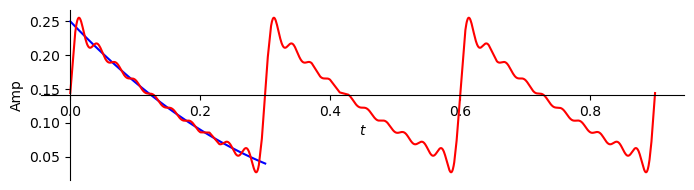

In [76]:
plt.rcParams['figure.figsize'] = 7, 2
#g1 = sym.plot(y, (t,0,1), ylabel=r'Amp',show=False,line_color='blue',legend=True, label = 'y(t) original')
#g2 = sym.plot(sym.re(y_ser), (t,-1,2), ylabel=r'Amp',show=False,line_color='red',legend=True, label = 'y(t) reconstruida')
g1 = sym.plot(y, (t,0,T), ylabel=r'Amp',show=False,line_color='blue')
g2 = sym.plot(sym.re(y_ser), (t,0,3*T), ylabel=r'Amp',show=False,line_color='red')

g1.extend(g2)
g1.show()

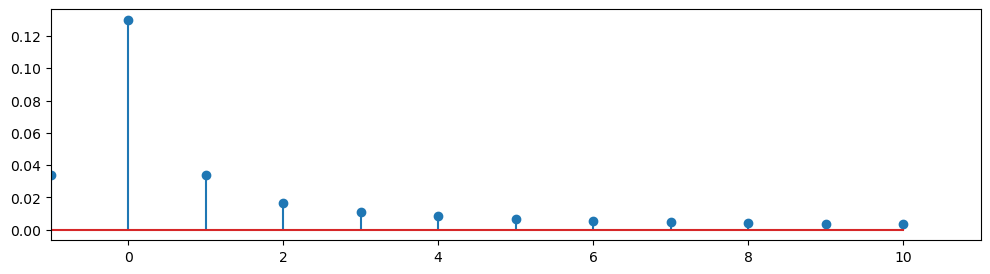

In [80]:
plt.rcParams['figure.figsize'] = 12, 3
plt.stem(espectro['n'],espectro['C_Abs'])
plt.xlim([-1,n_max+1])

In [65]:
y

<StemContainer object of 3 artists>

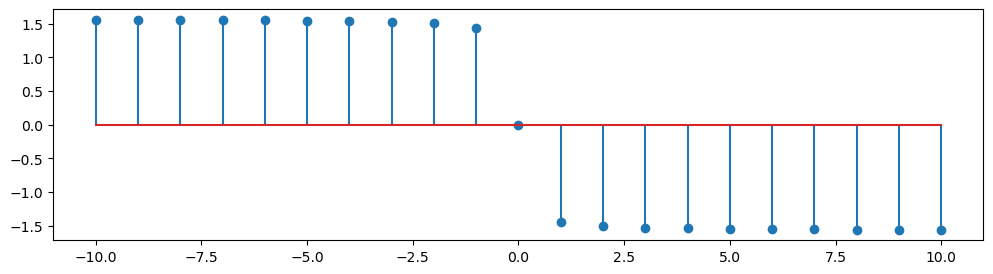

In [78]:
plt.rcParams['figure.figsize'] = 12, 3
plt.stem(espectro['n'],espectro['C_Arg'])

**Ejercicio**

Use las siguientes funciones para definir un periodo de una señal periódica con periodo $T=1$:

\begin{equation}
y_1(t) = \begin{cases}
-1 &  0 \leq t < 0.5 \\
1 &  0.5 \leq t < 1 
\end{cases}
\end{equation}


\begin{equation}
y_2(t) = t
\end{equation}

\begin{equation}
y_3(t) = 3 sin(2 \pi t)
\end{equation}

Varíe la cantidad de componentes que reconstruyen cada función y analice la reconstrucción obtenida y los valores de $C_n$

In [ ]:
pd.__version__